In [1]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("/content/IRIS.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


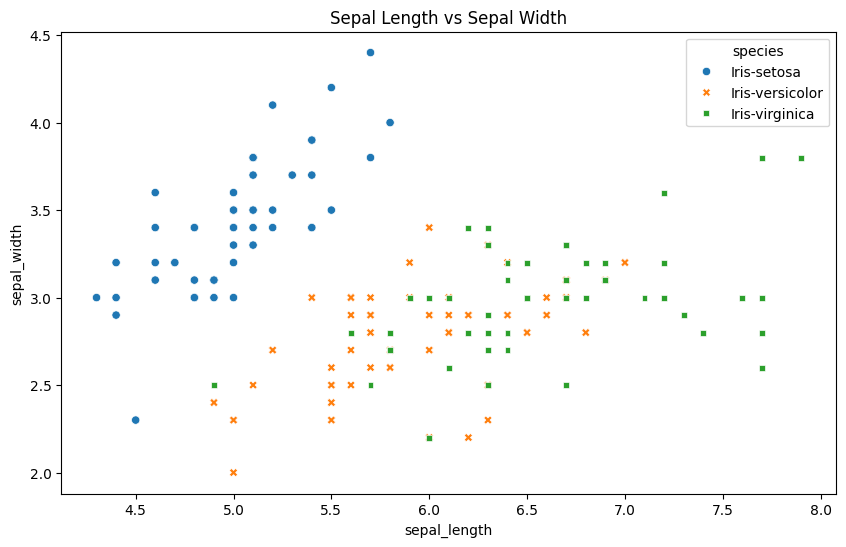

In [4]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='sepal_length', y='sepal_width', hue='species', style='species')
plt.title('Sepal Length vs Sepal Width')
plt.show()

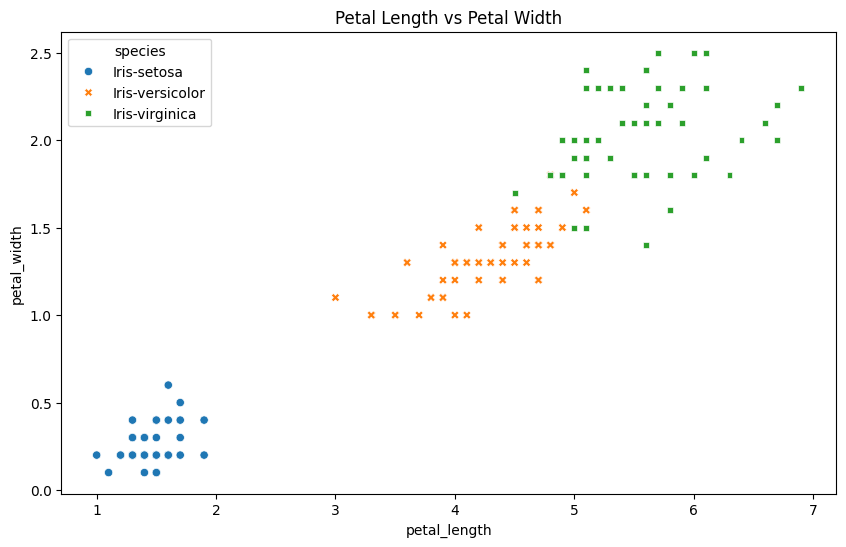

In [5]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='petal_length', y='petal_width', hue='species', style='species')
plt.title('Petal Length vs Petal Width')
plt.show()

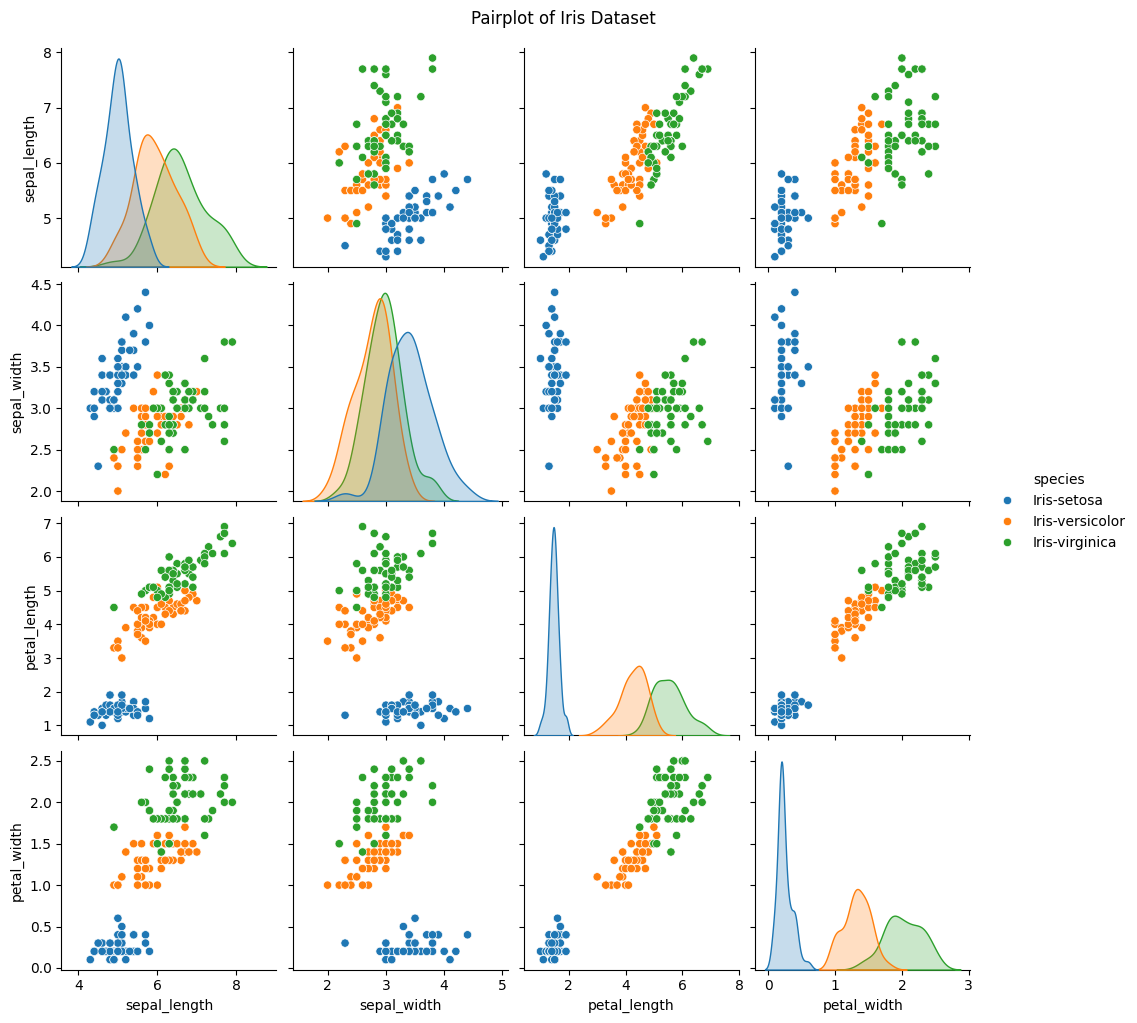

In [6]:
sns.pairplot(df, hue='species')
plt.suptitle('Pairplot of Iris Dataset', y=1.02)
plt.show()

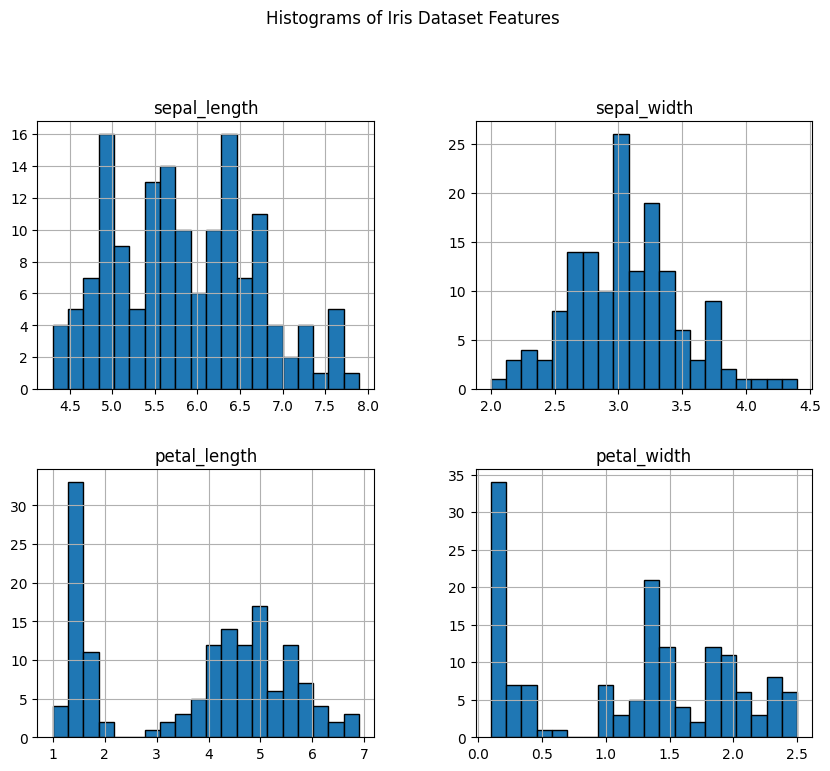

In [7]:
df.hist(figsize=(10, 8), bins=20, edgecolor='black')
plt.suptitle('Histograms of Iris Dataset Features', y=1.02)
plt.show()

In [8]:
df['species'].value_counts()

,count
species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [26]:

from sklearn.preprocessing import OrdinalEncoder
ordinalencoder = OrdinalEncoder(categories=[['setosa', 'versicolor', 'virginica']])
df['species'] = ordinalencoder.fit_transform(df[['species']])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 0 to 4
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   species  5 non-null      float64
dtypes: float64(1)
memory usage: 80.0 bytes


In [13]:
df.isnull().sum()

,0
species,0


In [14]:
df.head()

,species
0,0.0
1,1.0
2,2.0
3,0.0
4,1.0


In [15]:
df['species'].value_counts()

,count
species,
0.0,2
1.0,2
2.0,1


In [27]:
masl = max(df['sepal_length'])
misl = min(df['sepal_length'])
masw = max(df['sepal_width'])
misw = min(df['sepal_width'])
mapw = max(df['petal_width'])
mipw = min(df['petal_width'])
mapl = max(df['petal_length'])
mipl = min(df['petal_length'])


print(f"max sepal length:{masl}")
print(f"min sepal length:{misl}")
print(f"max sepal width:{masw}")
print(f"min sepal width: {misw}")
print(f"max petal length:{mapl}")
print(f"min petal length:{mipl}")
print(f"max petal width:{mapw}")
print(f"max petal width:{mipw}")

max sepal length:5.1
min sepal length:4.6
max sepal width:3.6
min sepal width: 3.0
max petal length:1.5
min petal length:1.3
max petal width:0.2
max petal width:0.2


In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['sepal_length', 'sepal_width','petal_length','petal_width']] = scaler.fit_transform(df[['sepal_length', 'sepal_width','petal_length','petal_width']])
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,1.293993,0.950255,0.000000,0.0
1,0.215666,-1.209416,0.000000,0.0
2,-0.862662,-0.345547,-1.581139,0.0
3,-1.401826,-0.777482,1.581139,0.0
4,0.754829,1.382189,0.000000,0.0


In [21]:
masl = max(df['sepal_length'])
misl = min(df['sepal_length'])
masw = max(df['sepal_width'])
misw = min(df['sepal_width'])
mapw = max(df['petal_width'])
mipw = min(df['petal_width'])
mapl = max(df['petal_length'])
mipl = min(df['petal_length'])


print(f"max sepal length:{masl}")
print(f"min sepal length:{misl}")
print(f"max sepal width:{masw}")
print(f"min sepal width: {misw}")
print(f"max petal length:{mapl}")
print(f"min petal length:{mipl}")
print(f"max petal width:{mapw}")
print(f"max petal width:{mipw}")


max sepal length:1.293993278441262
min sepal length:-1.401826051644698
max sepal width:1.3821894809301776
min sepal width: -1.2094157958139033
max petal length:1.5811388300841915
min petal length:-1.581138830084188
max petal width:0.0
max petal width:0.0


In [25]:
x = df.drop('species',axis=1)
y = df['species']

In [28]:
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [29]:
y

,species
0,setosa
1,versicolor
2,virginica
3,setosa
4,versicolor


In [30]:
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [31]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [36]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)


In [41]:
grid_search = GridSearchCV(estimator=model, param_grid={'C': [1], 'kernel': ['linear']}, cv=3, n_jobs=-1, verbose=2)


In [43]:
print(x_train.shape, y_train.shape)
print(set(y_train))


(4, 4) (4,)
{0, 1, 2}


In [49]:
if hasattr(grid_search, "best_params_"):
    print("Best parameters found by Grid Search:", grid_search.best_params_)
    print("Best cross-validation score:", grid_search.best_score_)
else:
    print("Error: GridSearchCV was not fitted properly. Check for issues in fit().")


Error: GridSearchCV was not fitted properly. Check for issues in fit().


In [50]:
print("Is GridSearchCV fitted?", hasattr(grid_search, "best_params_"))


Is GridSearchCV fitted? False


In [57]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
if hasattr(grid_search, "best_estimator_"):
    y_pred = grid_search.best_estimator_.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro', zero_division=1)
    recall = recall_score(y_test, y_pred, average='macro', zero_division=1)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=1)
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"Precision: {precision * 100:.2f}%")
    print(f"Recall: {recall * 100:.2f}%")
    print(f"F1-score: {f1 * 100:.2f}%")
else:
    print("Error: GridSearchCV is not fitted. Run grid_search.fit(x_train, y_train) first.")


Error: GridSearchCV is not fitted. Run grid_search.fit(x_train, y_train) first.


In [60]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
if hasattr(grid_search, "best_estimator_"):
    y_pred = grid_search.best_estimator_.predict(x_test)
    conf_matrix = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
    disp.plot()
else:
    print("Error: GridSearchCV is not fitted. Run grid_search.fit(x_train, y_train) first.")


Error: GridSearchCV is not fitted. Run grid_search.fit(x_train, y_train) first.


In [65]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
if 'y_test' in locals() and 'y_pred' in locals():
    conf_matrix = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
    disp.plot(cmap='Blues')
    disp.ax_.set_title('Confusion Matrix')
    disp.ax_.set_xlabel('Predicted Label')
    disp.ax_.set_ylabel('True Label')
    plt.show()
else:
    print("Error: y_test or y_pred is not defined. Ensure model prediction is completed.")


Error: y_test or y_pred is not defined. Ensure model prediction is completed.


In [67]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
try:
    conf_matrix = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
    fig, ax = plt.subplots(figsize=(6,6))
    disp.plot(cmap='Blues', ax=ax)
    ax.set_title('Confusion Matrix')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    plt.show()

except NameError as e:
    print(f"Error: {e}. Ensure y_test and y_pred are correctly defined before running this code.")


Error: name 'y_pred' is not defined. Ensure y_test and y_pred are correctly defined before running this code.
